In [2]:
!pip install deepxde

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 3.4 MB/s eta 0:00:0000:01


In [3]:
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt
import pytorch 

# Manually specify the PyTorch backend
dde.backend.backend_name = "pytorch"  # Set the backend to PyTorch

# For reproducibility: fix all random seeds used by DeepXDE / TensorFlow backend
dde.config.set_random_seed(1234)

No backend selected.
Finding available backend...
2025-12-05 22:39:19.514340: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764974359.832465      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764974359.944018      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

Found tensorflow
Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


Setting the default backend to "tensorflow". You can change it in the ~/.deepxde/config.json file or export the DDE_BACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle (all lowercase)


2025-12-05 22:39:43.430954: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Compiling model...
'compile' took 0.060601 s

Training model...

Step      Train loss                        Test loss                         Test metric   
0         [3.76e+01, 2.18e+00, 9.40e-01]    [3.70e+01, 2.18e+00, 9.40e-01]    [1.27e+00]    
1000      [3.82e-03, 1.50e-04, 5.67e-03]    [3.93e-03, 1.50e-04, 5.67e-03]    [3.69e-02]    
2000      [1.46e-03, 7.84e-05, 3.59e-04]    [2.15e-03, 7.84e-05, 3.59e-04]    [3.03e-02]    
3000      [7.88e-04, 1.57e-04, 3.08e-04]    [1.45e-03, 1.57e-04, 3.08e-04]    [2.93e-02]    
4000      [4.60e-04, 3.13e-05, 3.74e-05]    [1.00e-03, 3.13e-05, 3.74e-05]    [2.79e-02]    
5000      [3.33e-04, 8.66e-05, 2.37e-04]    [8.25e-04, 8.66e-05, 2.37e-04]    [2.71e-02]    
6000      [8.48e-04, 1.80e-03, 5.38e-03]    [1.20e-03, 1.80e-03, 5.38e-03]    [2.65e-02]    
7000      [2.01e-04, 9.42e-06, 1.07e-05]    [7.52e-04, 9.42e-06, 1.07e-05]    [2.74e-02]    
8000      [3.16e-04, 1.70e-03, 1.49e-05]    [9.83e-04, 1.70e-03, 1.49e-05]    [2.88e-02]    
9000 

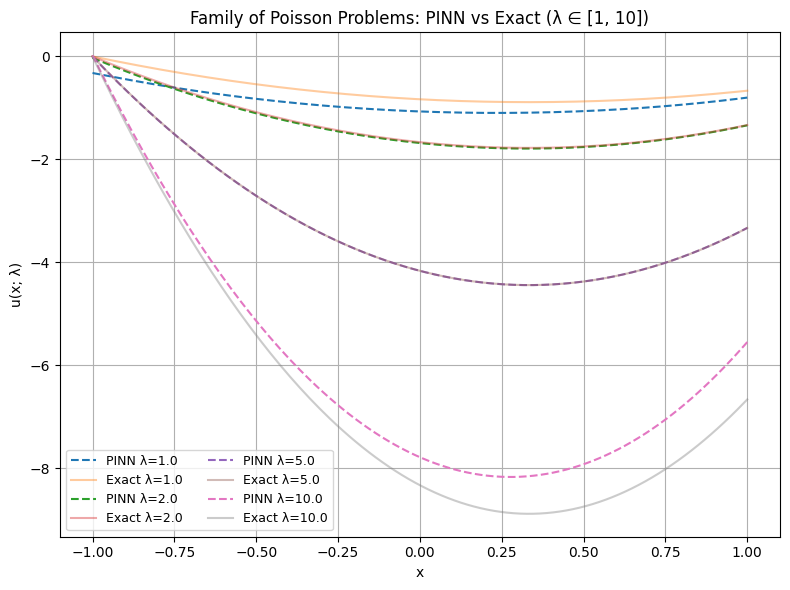

In [8]:
'''
Solving a family of Poisson problems can be applied to various problems as below.

1) Steady-state 1D heat conduction with internal heat generation:
   - u(x; λ) represents the temperature in a wall or rod.
   - The PDE u''(x) = λ corresponds to a uniform volumetric heat source whose strength
     is controlled by λ (e.g., different power levels, materials, or operating conditions).
   - The left boundary u(-1, λ) = 0 can model a face held at a fixed reference temperature,
     while the Robin condition u_x(1, λ) + u(1, λ) = 0 mimics convective cooling on the
     right side (a linear heat loss to the environment).
   - Varying λ lets us study how the temperature profile and boundary heat flux respond
     as internal heating increases or decreases.

2) Small-deflection bending of a slender beam under a distributed load:
   - u(x; λ) can be interpreted as the transverse deflection of a beam.
   - In Euler–Bernoulli theory, u'' is related to bending moment; taking u''(x) = λ
     is analogous to imposing a uniform effective load or curvature controlled by λ.
   - The left Dirichlet condition can represent a clamped or fixed-displacement end,
     while the Robin-type condition at x = 1 can be viewed as a combination of moment
     and rotational stiffness (a “soft” support rather than a perfectly free or fixed end).
   - Sweeping λ corresponds to exploring a family of load cases or stiffness parameters
     without re-solving the BVP from scratch.

3) Steady-state diffusion / transport with a uniform source or sink:
   - u(x; λ) may represent the concentration of a chemical species in a 1D channel.
   - The equation u''(x) = λ can model uniform production (or consumption) of the species,
     scaled by λ (different reaction rates, injection rates, or source intensities).
   - The left boundary fixes the concentration at x = -1, and the Robin condition at x = 1
     describes exchange with the environment through a linear “leak” or mass transfer
     law (flux proportional to the boundary concentration).
   - Changing λ allows us to see how concentration profiles and boundary fluxes respond
     to different source strengths.

In all of these interpretations, λ is not just a mathematical knob; it encodes a physical
design or operating parameter (heating level, applied load, reaction rate, etc.). Learning
a single parametric surrogate u(x; λ) with a PINN lets us query many scenarios quickly
instead of solving a separate PDE for each λ.

At the same time, this toy model has important limitations:
- In real systems, material properties, convection coefficients, or boundary conditions
  may depend on temperature, load, or concentration (and thus implicitly on λ), which
  is not captured here.
- For very large λ, the linear Poisson model and 1D approximation can break down
  (e.g., material yield, nonlinear heat transfer, or multi-dimensional effects).
- Real applications often involve coupled fields, geometric nonlinearities, or time
  dependence, whereas this example is linear, 1D, and steady-state.

Therefore, this family-of-Poisson setup is best viewed as a physically inspired sandbox
for experimenting with parametric PINNs, rather than a fully realistic engineering model.

'''

# =========================================================
# 1. PDE definition: parametric Poisson u''(x) = λ
# =========================================================
def pde(X, y):
    """
    Physics-informed residual for the parametric Poisson problem:

        u''(x) = λ,     x ∈ [-1, 1],   λ ∈ [1, 10]

    DeepXDE passes:
        - X : a tensor of shape (N, 2)
              X[:, 0] = x  coordinates
              X[:, 1] = λ  parameter values
        - y : the network output u(x, λ) of shape (N, 1)

    Our PDE must be written in residual form F(x, λ, u, ...) = 0.
    We choose:

        F = u_xx - λ = 0

    so the PINN will try to make u_xx ≈ λ everywhere in the domain.
    """

    # -----------------------------------------------------------------
    # Split the input into "x" and "λ" coordinates
    # -----------------------------------------------------------------
    # X[:, 0:1] is a column vector of x values, shape (N,1)
    x = X[:, 0:1]

    # X[:, 1:2] is a column vector of λ values, shape (N,1)
    lam = X[:, 1:2]

    # -----------------------------------------------------------------
    # Compute first and second derivatives of u(x, λ) w.r.t. x
    # -----------------------------------------------------------------
    # u_x = ∂u/∂x:
    #   dde.grad.jacobian(y, X, i=0, j=0) means:
    #       "take partial derivative of y (component i=0) w.r.t X (component j=0)"
    #   Since y has only 1 component, i=0 is fine.
    #   Since X has two components [x, λ], j=0 refers to x.
    u_x = dde.grad.jacobian(y, X, i=0, j=0)

    # u_xx = ∂²u/∂x²:
    #   take derivative of u_x w.r.t. x again (same logic, j=0).
    u_xx = dde.grad.jacobian(u_x, X, i=0, j=0)

    # -----------------------------------------------------------------
    # PDE residual:
    #     u_xx - λ = 0
    #
    # DeepXDE will square this residual, average over collocation points,
    # and include it in the total loss.
    # -----------------------------------------------------------------
    return u_xx - lam


# =========================================================
# 2. Boundary conditions
#    u(-1, λ) = 0                (Dirichlet on the left)
#    u_x(1, λ) + u(1, λ) = 0     (Robin on the right, Bi=1, u_inf=0)
# =========================================================

def boundary_value_left(X):
    """
    Dirichlet boundary value g(x, λ) on the left boundary x = -1.

    For all λ in [1, 10], we want:

        u(-1, λ) = 0

    DeepXDE will call this function for points on the boundary that
    satisfy boundary_left(...). The return value is the target value
    that u should match there.
    """
    return 0.0


def boundary_left(X, on_boundary):
    """
    Indicator function that selects the left boundary x = -1.

    Args:
        X           : array-like with two entries [x, λ]
        on_boundary : bool, True if X lies somewhere on the domain boundary

    Returns:
        True if and only if:
          1) the point is on the boundary, and
          2) its x-coordinate is (numerically) equal to -1.

    dde.utils.isclose() is used instead of a strict equality to allow
    for small floating-point errors.
    """
    # X[0] is x-coordinate, X[1] is λ
    return on_boundary and dde.utils.isclose(X[0], -1.0)


# ----- Robin BC on the right: u_x(1, λ) + u(1, λ) = 0 -----

def robin_value_right(X):
    """
    Robin boundary 'right-hand side' function g(x, λ) on the right boundary x = 1.

    We want the Robin boundary condition:

        u_x(1, λ) + u(1, λ) = 0

    which can be written as:
        n·∇u + β u = g

    with:
        n = +1 (outward normal in 1D at x=1),
        β = 1,
        g = 0.

    So here we simply return 0.0.
    """
    return 0.0


def robin_coefficient_right(X):
    """
    Coefficient β(x, λ) in the Robin boundary condition:

        n·∇u + β u = g.

    For u_x(1, λ) + u(1, λ) = 0, we choose β = 1 (constant).

    DeepXDE will evaluate this function at boundary points on x = 1.
    """
    return 1.0


def boundary_right(X, on_boundary):
    """
    Indicator function that selects the right boundary x = 1.

    Returns:
        True if the point is on the boundary AND its x-coordinate
        is (approximately) equal to +1.
    """
    return on_boundary and dde.utils.isclose(X[0], 1.0)



# =========================================================
# Geometry definition: (x, λ) ∈ [-1,1] × [1,10]
# =========================================================

# We define a 2D rectangular domain in the plane (x, λ),
# where:
#   x   ∈ [-1, 1]
#   λ   ∈ [ 1,10]
# xmin and xmax are given as 2D vectors [x_min, λ_min], [x_max, λ_max].
geom = dde.geometry.Rectangle(xmin=[-1.0, 1.0], xmax=[1.0, 10.0])

# Dirichlet boundary condition on the left boundary x = -1:
#   - geom: domain
#   - boundary_value_left: value to enforce u(-1, λ) = 0
#   - boundary_left: function selecting which points are on this boundary
#   - component=0: network output component index (0 for u)
bc_left = dde.icbc.DirichletBC(
    geom, boundary_value_left, boundary_left, component=0
)

# Robin BC at x = 1: u_x + u = 0  (Bi=1, u_inf=0)
# DeepXDE's RobinBC implements: n·∇u + β(x) u = g(x)
bc_right = dde.icbc.RobinBC(
    geom,
    lambda X, y: -y,   # target value for du/dx on the boundary: du/dx = -u
    boundary_right,    # selects x = 1 boundary
    component=0)

'''
' lambda X, y: -y ' same as below.

def f(X, y):
    return -y

=> from 'u_x + u = 0'
'''


# =========================================================
# DeepXDE data object: PDE + BCs + sampling strategy
# =========================================================
'''
data = dde.data.PDE(
    geom=geom,               # spatial/parameter domain
    pde=pde,                 # PDE residual function
    bc=[bc_left, bc_right],  # list of boundary conditions
    num_domain=64,           # number of random interior collocation points per epoch
    num_boundary=16,         # number of random boundary points per epoch
    solution=exact_family,   # exact solution for error reporting
    num_test=1000            # number of test points sampled for metrics
)
'''
data = dde.data.PDE(
    geom,
    pde,
    [bc_left, bc_right],  
    64,
    16,
    solution=exact_family,
    num_test=1000)


# =========================================================
# Neural network architecture: u(x, λ) → ℝ
# =========================================================

# layer_size defines each fully-connected layer:
#   input dimension : 2 (x and λ)
#   hidden layers   : 3 layers with 50 neurons each
#   output dimension: 1 (scalar u)
layer_size = [2] + [50] * 3 + [1]

# Tanh activation function is widely used for PINNs
activation = "tanh"

# "Glorot uniform" (Xavier uniform) weight initialization
initializer = "Glorot uniform"

# Build a fully-connected neural network (FNN) with the given configuration.
# DeepXDE will internally create tf.keras layers with these specs.
net = dde.nn.FNN(layer_size, activation, initializer)


# =========================================================
# 7. Model compilation and training
# =========================================================

# Combine the PDE data object and the neural network into a DeepXDE model
model = dde.Model(data, net)

# Compile the model:
#   - "adam"    : use Adam optimizer
#   - lr=0.001  : learning rate
#   - metrics   : additional metrics to log; here we track relative L2 error
model.compile(
    optimizer="adam",
    lr=0.001,
    metrics=["l2 relative error"]
)

# Train the PINN for 10,000 iterations.
# losshistory    : contains the values of each loss term over iterations
# train_state    : final state, including best model, metrics, etc.
losshistory, train_state = model.train(iterations=10000)


# =========================================================
# Analytical family of exact solutions u(x; λ)
# =========================================================

def exact_family(X):
    """
    Analytical closed-form solution u(x; λ) for the updated parametric BVP:

        u''(x) = λ
        u(-1, λ) = 0
        u_x(1, λ) + u(1, λ) = 0

    Derivation:

    1) Integrate u''(x) = λ:     u'(x) = λ x + C1

    2) Integrate again:        u(x) = (λ/2) x^2 + C1 x + C2

    3) Apply boundary conditions.

       (a) At x = -1: u(-1, λ) = 0

           0 = (λ/2)(-1)^2 + C1(-1) + C2
             = λ/2 - C1 + C2
           → C2 = C1 - λ/2

       (b) Robin at x = 1: u_x(1, λ) + u(1, λ) = 0

           u_x(x) = λ x + C1  → u_x(1) = λ + C1
           u(1)   = (λ/2)*1^2 + C1*1 + C2 = λ/2 + C1 + C2

           Condition:
               (λ + C1) + (λ/2 + C1 + C2) = 0
               → (3/2 λ) + 2C1 + C2 = 0

           Substitute C2 = C1 - λ/2:

               (3/2 λ) + 2C1 + (C1 - λ/2) = 0
             → (3/2 λ - λ/2) + 3C1 = 0
             → λ + 3C1 = 0
             → C1 = -λ/3

           Then:
               C2 = C1 - λ/2 = -λ/3 - λ/2 = -5λ/6

    4) Final formula:

        u(x; λ) = (λ/2)x^2 - (λ/3)x - (5λ/6)

    DeepXDE can use this function to compute pointwise errors and
    relative L2 error over test points.
    """
    # Extract x and λ from X
    x = X[:, 0:1]
    lam = X[:, 1:2]

    # Implement the formula u(x; λ) = (λ/2)x^2 - (λ/3)x - (5λ/6)
    return (lam / 2.0) * x**2 - (lam / 3.0) * x - (5.0 * lam / 6.0)




# =========================================================
# Evaluation: compare PINN vs exact for several λ values
# =========================================================

# 1D grid of x-values in [-1, 1] for plotting
x_plot = np.linspace(-1, 1, 200).reshape(-1, 1)

# Choose some representative λ values in [1, 10] to visualize
lambda_list = [1.0, 2.0, 5.0, 10.0]

plt.figure(figsize=(8, 6))

for lam_val in lambda_list:
    # For a fixed λ, build a batch of (x, λ) pairs:
    #   - x varies along the grid
    #   - λ is constant lam_val across all rows
    lam_col = lam_val * np.ones_like(x_plot)
    X_query = np.hstack([x_plot, lam_col])  # shape (200, 2)

    # Use the trained PINN to predict u(x; λ) at these points
    u_pinn = model.predict(X_query)

    # Compute the exact analytical solution for the same (x, λ) pairs
    u_exact = exact_family(X_query)

    # Plot PINN prediction as dashed line
    plt.plot(
        x_plot,
        u_pinn,
        "--",
        label=f"PINN λ={lam_val:.1f}"
    )

    # Plot exact solution as a solid, slightly transparent line
    plt.plot(
        x_plot,
        u_exact,
        "-",
        alpha=0.4,
        label=f"Exact λ={lam_val:.1f}"
    )

# Add labels and formatting
plt.xlabel("x")
plt.ylabel("u(x; λ)")
plt.title("Family of Poisson Problems: PINN vs Exact (λ ∈ [1, 10])")
plt.grid(True)

# To avoid duplicate labels (PINN+Exact for each λ) we can merge legends,
# but for simplicity we just show them all.
plt.legend(ncol=2, fontsize=9)

plt.tight_layout()
plt.show()